<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

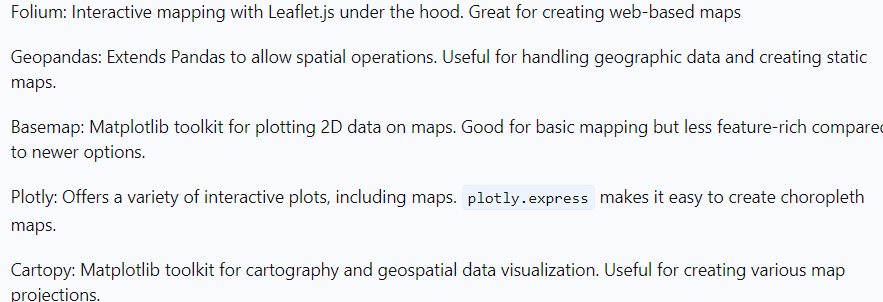

## Dataset Loading

In [292]:
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [293]:
df = pd.read_csv(Belga_0711_url)

In [294]:
df.sample(10)

,id,driver,datePH,longitude,latitude,altitude,gpsSpeed,timeStamp,calEngineLoad,vehSpeed,...,Altitude,Accuracy,Hour,Min,Sec,Feedno,Withpass,Withevent,Cumpass,Pass
27849,64accc943c6ae81205c0e786,Roly Belga,20230711,120.986903,14.535678,0,34,2023-07-11T03:29:22.000+0000,57,36,...,56.40,3.62,11.0,29.0,22.0,25874.0,1.0,2.0,28.0,0.0
53231,64ad3330348aa917282ac96e,Roly Belga,20230711,120.997640,14.657185,48,0,2023-07-11T10:47:11.000+0000,36,1,...,67.90,12.83,18.0,47.0,11.0,47676.0,1.0,2.0,55.0,0.0
39431,64acfe7189c46055ec8e7137,Roly Belga,20230711,121.056290,14.586868,43,0,2023-07-11T07:02:08.000+0000,52,4,...,116.49,14.15,15.0,2.0,8.0,36242.0,1.0,2.0,17.0,0.0
48972,64ad23187978f2022b1fdedb,Roly Belga,20230711,121.058630,14.593497,51,38,2023-07-11T09:38:30.000+0000,10,39,...,164.90,6.81,17.0,38.0,30.0,44011.0,1.0,2.0,70.0,0.0
9460,64ac871ab8c3782b6b000626,Roly Belga,20230711,121.056388,14.587292,36,0,2023-07-10T22:32:55.000+0000,45,3,...,93.70,3.57,6.0,32.0,55.0,9604.0,1.0,2.0,53.0,0.0
49763,64ad26177978f2022b1feaeb,Roly Belga,20230711,121.047143,14.628418,45,0,2023-07-11T09:51:16.000+0000,51,0,...,81.10,10.28,17.0,51.0,16.0,44784.0,1.0,2.0,59.0,0.0
50428,64ad288d7978f2022b1ff38f,Roly Belga,20230711,121.032987,14.651285,60,4,2023-07-11T10:01:46.000+0000,54,3,...,84.60,12.35,18.0,1.0,46.0,45447.0,1.0,2.0,71.0,0.0
42539,64ad0af32ad737690bb2305d,Roly Belga,20230711,120.989760,14.511920,17,21,2023-07-11T07:55:12.000+0000,0,22,...,49.70,3.98,15.0,55.0,12.0,39389.0,1.0,2.0,15.0,0.0
53977,64ad360e348aa917282ad7fa,Roly Belga,20230711,121.019720,14.657587,37,0,2023-07-11T10:59:21.000+0000,38,0,...,66.90,10.70,18.0,59.0,21.0,48422.0,1.0,2.0,61.0,0.0
29429,64acd8440e0d0c223db15359,Roly Belga,20230711,120.990960,14.520223,12,35,2023-07-11T04:19:15.000+0000,0,35,...,50.30,3.90,12.0,19.0,15.0,27095.0,1.0,2.0,32.0,0.0


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   59962 non-null  object 
 1   driver               59962 non-null  object 
 2   datePH               59962 non-null  int64  
 3   longitude            59962 non-null  float64
 4   latitude             59962 non-null  float64
 5   altitude             59962 non-null  int64  
 6   gpsSpeed             59962 non-null  int64  
 7   timeStamp            59962 non-null  object 
 8   calEngineLoad        59962 non-null  int64  
 9   vehSpeed             59962 non-null  int64  
 10  throttlePosition     59962 non-null  int64  
 11  ambientAirTemp       59962 non-null  int64  
 12  engineOilTemp        59962 non-null  int64  
 13  Speed                59962 non-null  int64  
 14  fuelPressure         59962 non-null  int64  
 15  engineRPM            59962 non-null 

In [296]:
df.describe()

,datePH,longitude,latitude,altitude,gpsSpeed,calEngineLoad,vehSpeed,throttlePosition,ambientAirTemp,engineOilTemp,...,Altitude,Accuracy,Hour,Min,Sec,Feedno,Withpass,Withevent,Cumpass,Pass
count,59962.0,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,59962.000000,...,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000,53385.000000
mean,20230711.0,121.015852,14.582620,31.943781,12.439695,40.623378,13.531353,16.221574,31.234882,91.116074,...,68.544674,7.283566,11.684256,29.035984,29.508439,27089.408954,1.032799,1.976042,38.653255,0.000468
std,0.0,0.024735,0.054249,18.870216,16.248403,22.730954,16.755636,26.054464,2.799451,2.627240,...,18.453354,8.305447,4.872378,16.987965,17.326651,15347.426785,0.178113,0.152920,16.971604,0.154785
min,20230711.0,120.983452,14.507295,-157.000000,0.000000,0.000000,0.000000,0.000000,27.000000,86.000000,...,-168.810000,2.150000,4.000000,0.000000,0.000000,532.000000,1.000000,1.000000,7.000000,-1.000000
25%,20230711.0,120.991318,14.537463,18.000000,0.000000,31.000000,0.000000,0.000000,29.000000,89.000000,...,55.800000,3.900000,8.000000,15.000000,15.000000,13775.000000,1.000000,2.000000,26.000000,0.000000
50%,20230711.0,121.009363,14.564530,31.000000,0.000000,41.000000,4.000000,0.000000,31.000000,91.000000,...,65.500000,4.250000,12.000000,29.000000,30.000000,27057.000000,1.000000,2.000000,35.000000,0.000000
75%,20230711.0,121.039225,14.644352,46.000000,27.000000,51.000000,28.000000,30.000000,34.000000,93.000000,...,81.000000,9.030000,16.000000,44.000000,45.000000,40396.000000,1.000000,2.000000,53.000000,0.000000
max,20230711.0,121.059888,14.657928,120.000000,62.000000,100.000000,65.000000,100.000000,39.000000,100.000000,...,309.660000,335.900000,20.000000,59.000000,59.000000,53641.000000,2.000000,2.000000,85.000000,1.000000


In [297]:
df.isnull().sum()

,0
id,0
driver,0
datePH,0
longitude,0
latitude,0
altitude,0
gpsSpeed,0
timeStamp,0
calEngineLoad,0
vehSpeed,0


In [298]:
df.duplicated().sum()

0

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   59962 non-null  object 
 1   driver               59962 non-null  object 
 2   datePH               59962 non-null  int64  
 3   longitude            59962 non-null  float64
 4   latitude             59962 non-null  float64
 5   altitude             59962 non-null  int64  
 6   gpsSpeed             59962 non-null  int64  
 7   timeStamp            59962 non-null  object 
 8   calEngineLoad        59962 non-null  int64  
 9   vehSpeed             59962 non-null  int64  
 10  throttlePosition     59962 non-null  int64  
 11  ambientAirTemp       59962 non-null  int64  
 12  engineOilTemp        59962 non-null  int64  
 13  Speed                59962 non-null  int64  
 14  fuelPressure         59962 non-null  int64  
 15  engineRPM            59962 non-null 

In [300]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())

id
['64ac640d8311b05aa142074b' '64ac640d8311b05aa142074a'
 '64ac640b8311b05aa1420746' ... '64ad4cb286571b3fe57f55a6'
 '64ad4cb286571b3fe57f55a5' '64ad4cb286571b3fe57f55a4']
driver
['Roly Belga']
datePH
[20230711]
longitude
[120.98904   120.98889   120.988825  ... 120.9916666 120.9916683
 120.9917116]
latitude
[14.5079683 14.5079516 14.5079383 ... 14.5108599 14.5108633 14.5109583]
altitude
[ -18  -34  -40  -39  -38  -37  -36  -35  -33  -31  -30  -29  -28  -27
  -26  -25  -23  -12  -11  -10   -9   -8   -7   -6   -5   -4   -2   -1
    0    1    2    3    4    5    6   13   14   15    9   10   11   12
   16    7    8   19   18   20   21   22   17   23   25   27   28   30
   31   33   37   41   43   47   49   50   52   54   55   56   53   57
   51   48   46   42   40   38   35   32   29   26   24   36   34   39
   44   45   59   60   64   65   66   63   62   61   58   69   72   71
   70   67   68   94   73   74   75   76   77   78   79   80   82   83
   84   86   87   85   -3  103  105  106

In [301]:
df.drop(columns = ['id','driver', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',
                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',
                   'Speed', 'fuelPressure', 'engineRPM', 'engineOilTemp',
                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',
                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',
                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',
                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)

In [302]:
df.sample(10)

,datePH,longitude,latitude,timestamp,Board,Alight,Numpass,Time,Hour,Min,Sec
34761,20230711,121.021178,14.657688,2023-07-11 13:46:08,False,False,32.0,13:46:08,13.0,46.0,8.0
17927,20230711,121.033287,14.553475,2023-07-11 08:48:35,False,False,25.0,08:48:35,8.0,48.0,35.0
18548,20230711,121.055530,14.583890,2023-07-11 08:58:35,False,False,27.0,08:58:35,8.0,58.0,35.0
15877,20230711,120.998890,14.537568,2023-07-11 08:14:47,False,False,30.0,08:14:47,8.0,14.0,47.0
41581,20230711,120.998980,14.537683,2023-07-11 15:38:01,False,False,3.0,15:38:01,15.0,38.0,1.0
51306,20230711,121.004765,14.657528,2023-07-11 18:16:00,False,False,57.0,18:16:00,18.0,16.0,0.0
13772,20230711,120.991748,14.511663,2023-07-11 07:40:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12044,20230711,120.990623,14.518172,2023-07-11 07:14:52,False,False,5.0,07:14:52,7.0,14.0,52.0
1705,20230711,120.999432,14.537420,2023-07-11 04:28:24,False,False,32.0,04:28:24,4.0,28.0,24.0
18298,20230711,121.045898,14.568182,2023-07-11 08:54:31,False,False,21.0,08:54:31,8.0,54.0,31.0


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59962 entries, 0 to 59961
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datePH     59962 non-null  int64  
 1   longitude  59962 non-null  float64
 2   latitude   59962 non-null  float64
 3   timestamp  59958 non-null  object 
 4   Board      53385 non-null  object 
 5   Alight     53385 non-null  object 
 6   Numpass    53385 non-null  float64
 7   Time       53385 non-null  object 
 8   Hour       53385 non-null  float64
 9   Min        53385 non-null  float64
 10  Sec        53385 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 5.0+ MB


In [304]:
df.dropna(inplace = True)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datePH     53385 non-null  int64  
 1   longitude  53385 non-null  float64
 2   latitude   53385 non-null  float64
 3   timestamp  53385 non-null  object 
 4   Board      53385 non-null  object 
 5   Alight     53385 non-null  object 
 6   Numpass    53385 non-null  float64
 7   Time       53385 non-null  object 
 8   Hour       53385 non-null  float64
 9   Min        53385 non-null  float64
 10  Sec        53385 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 4.9+ MB


In [306]:
from sklearn.cluster import KMeans

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=21, random_state=42)  # Choose a reasonable number of clusters
df['stop_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])

In [307]:
df[df['Board']==True]

,datePH,longitude,latitude,timestamp,Board,Alight,Numpass,Time,Hour,Min,Sec,stop_cluster
18,20230711,120.988783,14.507963,2023-07-11 04:01:13,True,False,15.0,04:01:13,4.0,1.0,13.0,18
28,20230711,120.988768,14.507970,2023-07-11 04:01:22,True,False,16.0,04:01:22,4.0,1.0,22.0,18
312,20230711,120.990620,14.524773,2023-07-11 04:05:48,True,False,16.0,04:05:48,4.0,5.0,48.0,6
504,20230711,120.988995,14.535418,2023-07-11 04:08:44,True,False,16.0,04:08:44,4.0,8.0,44.0,19
524,20230711,120.988997,14.535923,2023-07-11 04:09:03,True,False,17.0,04:09:03,4.0,9.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
57421,20230711,121.028302,14.550112,2023-07-11 19:55:14,True,False,35.0,19:55:14,19.0,55.0,14.0,1
57422,20230711,121.028302,14.550112,2023-07-11 19:55:15,True,False,36.0,19:55:15,19.0,55.0,15.0,1
57427,20230711,121.028302,14.550112,2023-07-11 19:55:19,True,False,37.0,19:55:19,19.0,55.0,19.0,1
57433,20230711,121.028302,14.550112,2023-07-11 19:55:24,True,False,38.0,19:55:24,19.0,55.0,24.0,1


In [308]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datePH        53385 non-null  int64  
 1   longitude     53385 non-null  float64
 2   latitude      53385 non-null  float64
 3   timestamp     53385 non-null  object 
 4   Board         53385 non-null  int64  
 5   Alight        53385 non-null  int64  
 6   Numpass       53385 non-null  float64
 7   Time          53385 non-null  object 
 8   Hour          53385 non-null  float64
 9   Min           53385 non-null  float64
 10  Sec           53385 non-null  float64
 11  stop_cluster  53385 non-null  int32  
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 5.1+ MB


In [310]:
df.drop(columns = ['Time', 'datePH'], inplace = True)

In [311]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53385 entries, 0 to 59959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   longitude     53385 non-null  float64       
 1   latitude      53385 non-null  float64       
 2   timestamp     53385 non-null  datetime64[ns]
 3   Board         53385 non-null  int64         
 4   Alight        53385 non-null  int64         
 5   Numpass       53385 non-null  float64       
 6   Hour          53385 non-null  float64       
 7   Min           53385 non-null  float64       
 8   Sec           53385 non-null  float64       
 9   stop_cluster  53385 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2)
memory usage: 4.3 MB


In [313]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [314]:
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Cluster 0: [120.98751702  14.65720874]
Cluster 1: [121.02846125  14.54958539]
Cluster 2: [121.05378788  14.61366771]
Cluster 3: [120.99154559  14.53674773]
Cluster 4: [121.02215528  14.65722855]
Cluster 5: [121.04627893  14.5689152 ]
Cluster 6: [120.99060697  14.52151776]
Cluster 7: [121.04346002  14.63496362]
Cluster 8: [121.05585172  14.58574763]
Cluster 9: [121.01795669  14.5413873 ]
Cluster 10: [121.03258053  14.65164395]
Cluster 11: [120.99774336  14.65728108]
Cluster 12: [121.00757821  14.53847384]
Cluster 13: [121.03689999  14.55656819]
Cluster 14: [121.01056033  14.65752805]
Cluster 15: [120.9993869   14.53759604]
Cluster 16: [121.03895434  14.64197577]
Cluster 17: [121.04729318  14.6276948 ]
Cluster 18: [120.99064908  14.51075543]
Cluster 19: [120.98869681  14.53280461]
Cluster 20: [121.05885014  14.5997619 ]


In [315]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster
0,120.989040,14.507968,2023-07-11 04:00:55,0,0,14.0,4.0,0.0,55.0,18
1,120.988890,14.507952,2023-07-11 04:00:56,0,0,14.0,4.0,0.0,56.0,18
2,120.988825,14.507938,2023-07-11 04:00:57,0,0,14.0,4.0,0.0,57.0,18
3,120.988810,14.507935,2023-07-11 04:00:58,0,0,14.0,4.0,0.0,58.0,18
4,120.988802,14.507937,2023-07-11 04:00:59,0,0,14.0,4.0,0.0,59.0,18


In [316]:
# Define the coordinates for the end clusters (example values)
cluster_0_coords = (14.65720874, 120.98751702)  # Example coordinates for cluster 0 (northmost terminal)
cluster_18_coords = (14.51075543, 120.99064908)  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_cluster_0'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], cluster_0_coords[0], cluster_0_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_cluster_18'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], cluster_18_coords[0], cluster_18_coords[1]), axis=1)

    return df

In [317]:
df = calculate_distance_from_terminals(df)

In [318]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_cluster_0' and 'distance_from_cluster_18' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_cluster_0'] = df['distance_from_cluster_0'].diff()
    df['dist_change_cluster_18'] = df['distance_from_cluster_18'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_cluster_0'] < 0 else 'Southbound' if row['dist_change_cluster_18'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()

    return df

In [319]:
df = determine_direction_based_on_terminals(df)
df

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction
0,120.989040,14.507968,2023-07-11 04:00:55,0,0,14.0,4.0,0.0,55.0,18,16.595589,0.355036,NaN,NaN,None
1,120.988890,14.507952,2023-07-11 04:00:56,0,0,14.0,4.0,0.0,56.0,18,16.597294,0.364773,0.001705,0.009737,None
2,120.988825,14.507938,2023-07-11 04:00:57,0,0,14.0,4.0,0.0,57.0,18,16.598712,0.369707,0.001418,0.004933,None
3,120.988810,14.507935,2023-07-11 04:00:58,0,0,14.0,4.0,0.0,58.0,18,16.599066,0.370877,0.000353,0.001170,None
4,120.988802,14.507937,2023-07-11 04:00:59,0,0,14.0,4.0,0.0,59.0,18,16.598880,0.371210,-0.000185,0.000333,Northbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59955,120.991610,14.510958,2023-07-11 20:35:21,0,0,0.0,20.0,35.0,21.0,18,16.268271,0.105872,0.000000,0.000000,Northbound
59956,120.991610,14.510958,2023-07-11 20:35:22,0,0,0.0,20.0,35.0,22.0,18,16.268271,0.105872,0.000000,0.000000,Northbound
59957,120.991610,14.510958,2023-07-11 20:35:23,0,0,0.0,20.0,35.0,23.0,18,16.268271,0.105872,0.000000,0.000000,Northbound
59958,120.991610,14.510958,2023-07-11 20:35:24,0,0,0.0,20.0,35.0,24.0,18,16.268271,0.105872,0.000000,0.000000,Northbound


In [320]:
import pandas as pd
import numpy as np

def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [321]:
df = assign_quarter_hour(df)
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour
47834,121.029532,14.550382,2023-07-11 17:20:13,0,0,30.0,17.0,20.0,13.0,1,12.709850,6.077099,0.001451,0.002331,Northbound,0
565,120.991312,14.536628,2023-07-11 04:09:43,0,0,17.0,4.0,9.0,43.0,3,13.414149,2.877816,-0.001699,0.001981,Northbound,1
36290,120.986390,14.657058,2023-07-11 14:10:48,0,0,0.0,14.0,10.0,48.0,0,0.122389,16.274592,0.000000,0.000000,Northbound,2
15109,120.990367,14.536462,2023-07-11 08:02:08,0,0,25.0,8.0,2.0,8.0,3,13.429970,2.858557,0.000000,0.000000,Southbound,0
10787,121.005258,14.538312,2023-07-11 06:54:19,0,0,12.0,6.0,54.0,19.0,12,13.357880,3.444078,0.000000,0.000000,Northbound,9
52714,120.990223,14.657220,2023-07-11 18:38:34,0,0,16.0,18.0,38.0,34.0,0,0.291134,16.286170,0.001615,0.000362,Southbound,6
2844,121.029352,14.549890,2023-07-11 04:46:38,0,0,58.0,4.0,46.0,38.0,1,12.754106,6.024172,0.000000,0.000000,Northbound,8
16216,121.001043,14.537422,2023-07-11 08:20:16,0,0,26.0,8.0,20.0,16.0,15,13.399011,3.169210,0.000315,0.002554,Northbound,0
24602,121.053395,14.614347,2023-07-11 10:36:18,0,0,32.0,10.0,36.0,18.0,2,8.541040,13.352320,0.000000,0.000000,Southbound,6
38532,121.046752,14.628658,2023-07-11 14:47:27,0,0,21.0,14.0,47.0,27.0,17,7.119634,14.433684,0.000000,0.000000,Southbound,8


In [322]:
def add_boarding_counts_per_cluster(df):
    """
    Adds two columns 'northbound_waiting_passengers' and 'southbound_waiting_passengers'
    that record the number of passengers waiting to board at each stop cluster,
    separated by direction (northbound or southbound), at each quarter-hour (15 min interval).

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'northbound_waiting_passengers' and 'southbound_waiting_passengers' columns
    """
    # Initialize the waiting passengers columns
    df['northbound_waiting_passengers'] = 0
    df['southbound_waiting_passengers'] = 0

    # Group by stop_cluster, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['stop_cluster', 'direction', 'Hour', 'QuarterHour']):
        direction = name[1]  # Extract direction from the group key

        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        if direction == 'Northbound':
            # Assign the count to the 'northbound_waiting_passengers' column for the entire group
            df.loc[group.index, 'northbound_waiting_passengers'] = waiting_count
        elif direction == 'Southbound':
            # Assign the count to the 'southbound_waiting_passengers' column for the entire group
            df.loc[group.index, 'southbound_waiting_passengers'] = waiting_count

    return df


In [323]:
df = add_boarding_counts_per_cluster(df)

In [324]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'northbound_waiting_passengers' and 'southbound_waiting_passengers' columns to
    subtract one from the cumulative count when a passenger boards at a specific stop_cluster,
    direction, and quarter-hour interval.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'Board',
      'northbound_waiting_passengers', 'southbound_waiting_passengers', 'direction', 'QuarterHour'

    Returns:
    - DataFrame with updated 'northbound_waiting_passengers' and 'southbound_waiting_passengers' columns
    """
    # Initialize dictionaries to keep track of cumulative waiting passengers for each (stop_cluster, direction) pair
    cumulative_waiting_northbound = {}
    cumulative_waiting_southbound = {}

    for idx, row in df.iterrows():
        cluster = row['stop_cluster']
        direction = row['direction']
        quarter_hour = (row['Hour'], row['QuarterHour'])

        # Update for Northbound direction
        if direction == 'Northbound':
            if cluster not in cumulative_waiting_northbound:
                cumulative_waiting_northbound[cluster] = row['northbound_waiting_passengers']

            # If a passenger boards (Board == True), decrease the count for Northbound
            if row['Board']:
                cumulative_waiting_northbound[cluster] = max(0, cumulative_waiting_northbound[cluster] - 1)

            # Update the northbound_waiting_passengers column
            df.at[idx, 'northbound_waiting_passengers'] = cumulative_waiting_northbound[cluster]

        # Update for Southbound direction
        elif direction == 'Southbound':
            if cluster not in cumulative_waiting_southbound:
                cumulative_waiting_southbound[cluster] = row['southbound_waiting_passengers']

            # If a passenger boards (Board == True), decrease the count for Southbound
            if row['Board']:
                cumulative_waiting_southbound[cluster] = max(0, cumulative_waiting_southbound[cluster] - 1)

            # Update the southbound_waiting_passengers column
            df.at[idx, 'southbound_waiting_passengers'] = cumulative_waiting_southbound[cluster]

    return df


In [325]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [326]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers
0,120.989040,14.507968,2023-07-11 04:00:55,0,0,14.0,4.0,0.0,55.0,18,16.595589,0.355036,NaN,NaN,None,0,0,0
1,120.988890,14.507952,2023-07-11 04:00:56,0,0,14.0,4.0,0.0,56.0,18,16.597294,0.364773,0.001705,0.009737,None,0,0,0
2,120.988825,14.507938,2023-07-11 04:00:57,0,0,14.0,4.0,0.0,57.0,18,16.598712,0.369707,0.001418,0.004933,None,0,0,0
3,120.988810,14.507935,2023-07-11 04:00:58,0,0,14.0,4.0,0.0,58.0,18,16.599066,0.370877,0.000353,0.001170,None,0,0,0
4,120.988802,14.507937,2023-07-11 04:00:59,0,0,14.0,4.0,0.0,59.0,18,16.598880,0.371210,-0.000185,0.000333,Northbound,0,2,0


In [327]:
df[df['Board'] == 1].sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers
44371,120.991733,14.511542,2023-07-11 16:24:23,1,0,4.0,16.0,24.0,23.0,18,16.203801,0.145822,0.0,0.0,Northbound,0,0,0
2091,120.999682,14.537473,2023-07-11 04:34:32,1,0,51.0,4.0,34.0,32.0,15,13.378165,3.125942,0.0,0.0,Northbound,5,0,0
13911,120.991748,14.511663,2023-07-11 07:42:49,1,0,3.0,7.0,42.0,49.0,18,16.190319,0.155540,0.0,0.0,Northbound,7,0,0
29737,120.989667,14.532545,2023-07-11 12:23:58,1,0,23.0,12.0,23.0,58.0,19,13.863905,2.425197,0.0,0.0,Northbound,0,0,0
15520,120.992072,14.536722,2023-07-11 08:08:53,1,0,28.0,8.0,8.0,53.0,3,13.406520,2.891364,0.0,0.0,Northbound,1,0,0
4475,121.046905,14.628610,2023-07-11 05:12:48,1,0,50.0,5.0,12.0,48.0,17,7.136807,14.435712,0.0,0.0,Northbound,2,0,0
53392,120.998105,14.657295,2023-07-11 18:49:51,1,0,18.0,18.0,49.0,51.0,11,1.139056,16.314188,0.0,0.0,Southbound,8,0,0
4455,121.046905,14.628610,2023-07-11 05:12:31,1,0,47.0,5.0,12.0,31.0,17,7.136807,14.435712,0.0,0.0,Northbound,2,3,0
23485,121.019633,14.657637,2023-07-11 10:18:46,1,0,41.0,10.0,18.0,46.0,4,3.455275,16.627601,0.0,0.0,Southbound,3,0,0
19626,121.053777,14.613950,2023-07-11 09:16:16,1,0,25.0,9.0,16.0,16.0,2,8.599734,13.335174,0.0,0.0,Northbound,3,0,0


In [328]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [329]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,Day_of_week
44754,120.991537,14.509817,2023-07-11 16:30:13,0,0,12.0,16.0,30.0,13.0,18,16.394965,0.141513,0.003509,0.002209,Southbound,5,0,0,1
42225,120.989798,14.529493,2023-07-11 15:50:14,0,0,2.0,15.0,50.0,14.0,19,14.203431,2.085568,0.000000,0.000000,Southbound,9,0,0,1
2103,120.999682,14.537473,2023-07-11 04:34:40,0,0,54.0,4.0,34.0,40.0,15,13.378165,3.125942,0.000000,0.000000,Northbound,5,0,0,1
31083,120.999090,14.537555,2023-07-11 12:45:47,0,0,23.0,12.0,45.0,47.0,15,13.363042,3.115413,0.000000,0.000000,Southbound,8,0,0,1
8451,121.046230,14.629932,2023-07-11 06:16:35,0,0,49.0,6.0,16.0,35.0,17,7.006995,14.539216,0.003626,-0.003487,Southbound,3,0,0,1
13858,120.991748,14.511663,2023-07-11 07:41:56,0,0,0.0,7.0,41.0,56.0,18,16.190319,0.155540,0.000000,0.000000,Northbound,7,0,0,1
9276,121.059632,14.599530,2023-07-11 06:29:51,0,0,48.0,6.0,29.0,51.0,20,10.066462,12.351635,0.000000,0.000000,Southbound,4,0,0,1
33006,121.056520,14.586647,2023-07-11 13:17:28,0,0,14.0,13.0,17.0,28.0,8,10.801946,11.021569,-0.001513,0.002330,Northbound,3,0,0,1
26759,121.008408,14.538605,2023-07-11 11:11:35,0,0,14.0,11.0,11.0,35.0,12,13.378357,3.639236,0.000000,0.000000,Southbound,2,0,0,1
47681,121.028968,14.549798,2023-07-11 17:17:57,0,0,13.0,17.0,17.0,57.0,1,12.749160,5.988319,0.000000,0.000000,Northbound,3,0,0,1


In [330]:
belga_0711 = df.copy()

In [331]:
df[df['Numpass'] == 0]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,Day_of_week
5939,120.986328,14.657212,2023-07-11 05:35:58,0,1,0.0,5.0,35.0,58.0,0,0.127879,16.291820,0.000000,0.000000,Southbound,6,0,0,1
5940,120.986328,14.657212,2023-07-11 05:35:58,0,0,0.0,5.0,35.0,58.0,0,0.127879,16.291820,0.000000,0.000000,Southbound,6,0,0,1
5941,120.986328,14.657212,2023-07-11 05:35:59,0,0,0.0,5.0,35.0,59.0,0,0.127879,16.291820,0.000000,0.000000,Southbound,6,0,0,1
5942,120.986328,14.657212,2023-07-11 05:36:00,0,0,0.0,5.0,36.0,0.0,0,0.127879,16.291820,0.000000,0.000000,Southbound,6,0,0,1
5943,120.986328,14.657212,2023-07-11 05:36:01,0,0,0.0,5.0,36.0,1.0,0,0.127879,16.291820,0.000000,0.000000,Southbound,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59955,120.991610,14.510958,2023-07-11 20:35:21,0,0,0.0,20.0,35.0,21.0,18,16.268271,0.105872,0.000000,0.000000,Northbound,6,0,0,1
59956,120.991610,14.510958,2023-07-11 20:35:22,0,0,0.0,20.0,35.0,22.0,18,16.268271,0.105872,0.000000,0.000000,Northbound,6,0,0,1
59957,120.991610,14.510958,2023-07-11 20:35:23,0,0,0.0,20.0,35.0,23.0,18,16.268271,0.105872,0.000000,0.000000,Northbound,6,0,0,1
59958,120.991610,14.510958,2023-07-11 20:35:24,0,0,0.0,20.0,35.0,24.0,18,16.268271,0.105872,0.000000,0.000000,Northbound,6,0,0,1


In [332]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['stop_cluster'].value_counts()

,count
stop_cluster,
4,17
2,8
14,5
17,5
8,5
10,3
5,3
15,3
16,2


# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [333]:
belga_4_to_6 = belga_0711[(belga_0711['Hour'] >= 4) & (belga_0711['Hour'] <= 6)]
belga_4_to_6 = belga_4_to_6[belga_4_to_6['Board'] == 1]
belga_4_to_6['stop_cluster'].value_counts()

,count
stop_cluster,
15,26
8,20
0,20
4,19
3,18
2,15
1,14
11,13
17,10


In [334]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [335]:
map_center = [belga_4_to_6['latitude'].mean(), belga_4_to_6['longitude'].mean()]

map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = belga_4_to_6['latitude'].tolist()
longitudes = belga_4_to_6['longitude'].tolist()

In [336]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in belga_4_to_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(marker_cluster)

cluster_map

In [337]:
for idx, row in belga_4_to_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(map)
map

In [338]:
#Waiting Time
#Overcrowding (Heuristic)

## Model training

In [339]:
X = df[['Hour', 'Min', 'Day_of_week', 'stop_cluster']]
y_north = df['northbound_waiting_passengers']  # If manually estimated or modeled
y_south = df['southbound_waiting_passengers']  # If manually estimated or modeled

# Train-test split
X_train, X_test, y_north_train, y_north_test = train_test_split(X, y_north, test_size=0.2, random_state=42)
X_train, X_test, y_south_train, y_south_test = train_test_split(X, y_south, test_size=0.2, random_state=42)

In [340]:
# XGBoost Regression Model
xg_model_north = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model_south = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xg_model_north.fit(X_train, y_north_train)
xg_model_south.fit(X_train, y_south_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [341]:
# Random Forest Regressor
rf_model_north = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_north.fit(X_train, y_north_train)

rf_model_south = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_south.fit(X_train, y_south_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [342]:
# Predictions
rf_north_preds = rf_model_north.predict(X_test)
xg_north_preds = xg_model_north.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_north_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_north_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model_north.score(X_north_test, y_north_test))
print(xg_model_north.score(X_north_test, y_north_test))

Random Forest RMSE: 0.15516899102931336
XGBoost RMSE: 0.15500300809899326
0.9666876027473881
0.9667588472366333


In [344]:
# Predictions
rf_south_preds = rf_model_south.predict(X_test)
xg_south_preds = xg_model_south.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_south_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_south_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model_south.score(X_test, y_south_test))
print(xg_model_south.score(X_test, y_south_test))

Random Forest RMSE: 1.2584920982114238
XGBoost RMSE: 1.2580833237862432
0.9416957690076047
0.9408017992973328


## Model Testing